# Projeto de análise de dados de predição de insuficiência cardíaca

Fonte: [Kaggle](https://www.kaggle.com/fedesoriano/heart-failure-prediction)

Informações dos campos:

* Age: age of the patient [years]
* Sex: sex of the patient [M: Male, F: Female]
* ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
* RestingBP: resting blood pressure [mm Hg]
* Cholesterol: serum cholesterol [mm/dl]
* FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
* ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
* Oldpeak: oldpeak = ST [Numeric value measured in depression]
* ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* HeartDisease: output class [1: heart disease, 0: Normal]

 Importação das bibliotecas necessárias para a análise e visualização de dados: 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline

Leitura do arquivo .csv do cojunto de dados para um dataframe: 

In [2]:
df = pd.read_csv('heart.csv')

Checando o info(): 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Checando o head(): 

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


* Remoção de linhas do dataFrame onde o colesterol e pressão arterial são 0

In [5]:
df = df[df['Cholesterol'] != 0]
df = df[df['RestingBP'] != 0]

# Questões básicas

* Qual a idade média das pessoas ?

In [6]:
df['Age'].mean()

52.88203753351206

* Qual a média do colesterol das 5 pessoas com maior idade? e das 5 pessoas com menor idade ?

In [7]:
#Maior idade
df.nlargest(5,'Age')['Cholesterol'].mean()

197.6

In [8]:
#Menor idade
df.nsmallest(5,'Age')['Cholesterol'].mean()

215.8

* Das 10 pessoas com maior nível de pressão arterial, quais tipos de dor no peito elas apresentam ?

In [9]:
df.nlargest(10,'RestingBP')['ChestPainType'].value_counts()

# 5 assintomáticas, 4 com angina atípica e 1 com dor não aginosa

ASY    5
ATA    4
NAP    1
Name: ChestPainType, dtype: int64

* Das pessoas com nível de glicemia em jejum maior que 120 mg/dl, quantas possuem doença cardíaca?

In [10]:
df[(df['FastingBS'] == 1) &(df['HeartDisease'] == 1)]['HeartDisease'].count()

82

* Qual o maior valor de colesterol desse conjunto de pessoas ?

In [11]:
df['Cholesterol'].max()

603

* Qual a média de colesterol para cada tipo de dor no peito ?

In [12]:
df.groupby('ChestPainType').mean()['Cholesterol']

ChestPainType
ASY    250.205405
ATA    242.873494
NAP    237.159763
TA     232.317073
Name: Cholesterol, dtype: float64

* Qual a média da frequência cardíaca máxima atingida para cada tipo de dor no peito ?

In [13]:
df.groupby('ChestPainType').mean()['MaxHR']

ChestPainType
ASY    131.048649
ATA    151.373494
NAP    147.124260
TA     149.487805
Name: MaxHR, dtype: float64

* Das pessoas com idade maior ou igual a 50 anos, quantas apresentam resultados do eletrocardiograma em repouso normais ? e das pessoas com menos de 50 anos ?

In [14]:
df[(df['Age'] >= 50) &(df['RestingECG'] == 'Normal')]['RestingECG'].count()

251

In [15]:
df[(df['Age'] < 50) &(df['RestingECG'] == 'Normal')]['RestingECG'].count()

194

* Das pessoas com doença cardíaca, quantas apresentam cada tipo de dor no peito ?

In [16]:
df[df['HeartDisease'] == 1]['ChestPainType'].value_counts()

ASY    274
NAP     46
ATA     21
TA      15
Name: ChestPainType, dtype: int64

* Qual a média do colesterol, pressão arterial em repouso e frequência cardíaca máxima das pessoas com hipertrofia ventricular esquerda ?

In [17]:
df[df['RestingECG'] == 'LVH']['Cholesterol'].mean()

253.10227272727272

In [18]:
df[df['RestingECG'] == 'LVH']['RestingBP'].mean()

133.7443181818182

In [19]:
df[df['RestingECG'] == 'LVH']['MaxHR'].mean()

144.4375

* Qual a média do colesterol, pressão arterial em repouso e frequência cardíaca máxima das pessoas sem doença cardíaca ?

In [20]:
df[df['HeartDisease'] == 0]['Cholesterol'].mean()

238.76923076923077

In [21]:
df[df['HeartDisease'] == 0]['RestingBP'].mean()

130.16410256410256

In [22]:
df[df['HeartDisease'] == 0]['MaxHR'].mean()

149.05897435897435

# Visualização

* Crie um gráfico que mostre a quantidade de pessoas por resultados de eletrocardiograma em repouso

<AxesSubplot:xlabel='RestingECG', ylabel='count'>

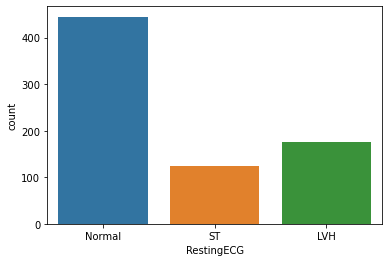

In [109]:
sn.countplot(x='RestingECG',data=df)

* Crie um gráfico que mostre as pessoas com nível de glicemia em jejum maior que 120 mg/dl e que possuem doença cardíaca, agrupadas por idade


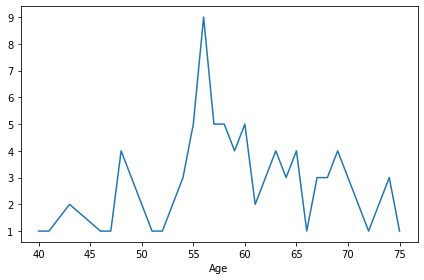

In [113]:
df[(df['FastingBS'] == 1) &(df['HeartDisease'] == 1)].groupby('Age').count()['FastingBS'].plot()
plt.tight_layout()

* Crie um gráfico que relacione as pessoas pelo sexo e resultados do eletrocardiograma em repouso

<AxesSubplot:xlabel='Sex', ylabel='RestingECG'>

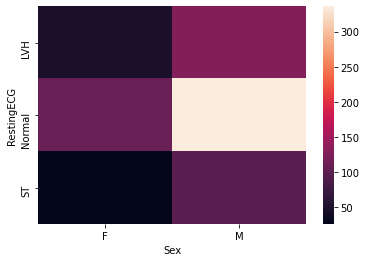

In [114]:
fn = df.groupby(by=['RestingECG','Sex']).count()['MaxHR'].unstack()
sn.heatmap(fn)

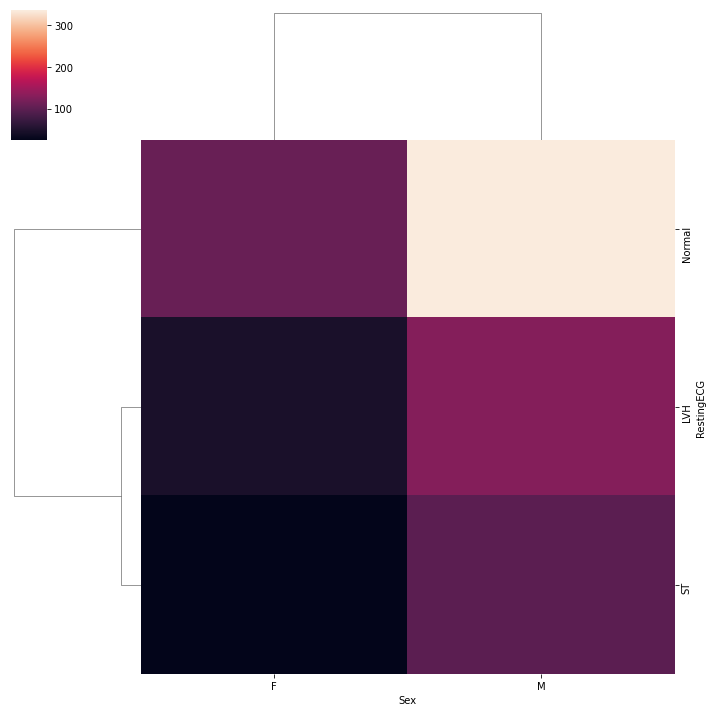

In [115]:
sn.clustermap(fn)